## 1. Dataset Creation

In [1]:
%load_ext autoreload
%autoreload 2

This notebook should serve as a guide to the creation of your Carnatic Music Instrument dataset. We will start with the loading of the dataset using the mirdata API, extract the relevant sections and instruments, apply any relevant processing steps, and store the dataset in an intuitive and accessible format.

Typical Carnatic Music ensembles contain a wide-range of instruments. For this task we are going to focus on:

- Voice
- Violin
- Mridangam

You can refer to the instrumentation section of the [compIAM tutorial](https://mtg.github.io/IAM-tutorial-ismir22/indian_art_music/carnatic-music.html) for more information.

The final dataset will be a collection of short audios corresponding to each of these instruments. They will be organised such that each can be retrieved according to the instrument they contain, the performer, the raga and a unique identifier (for reproducibility later).

It is up to you to fill in each subsection with the relevant code to perform that task. If possible, try and split the sections amongst the project group to work in parallel. When the task is complete, you should try and abstract the code into .py files so that it can be ran without a python notebook.

### Explore Dataset

You can access the Saraga Carnatic dataset using the [mirdata API](https://github.com/mir-dataset-loaders/mirdata). You should already have the dataset downloaded on your machine in the mirdata repository.

In [2]:
import mirdata

In [3]:
#CHANGE FOR YOUR PATH TO DATASET
data_home = r'C:\UPF\2023\3rd Term\Taller\DataAPI'

In [4]:
saraga = mirdata.initialize('saraga_carnatic',data_home=data_home)
saraga.validate()

100%|██████████| 249/249 [00:57<00:00,  4.33it/s]
INFO: Success: the dataset is complete and all files are valid.
INFO: --------------------


({'tracks': {}}, {'tracks': {}})

You can choose a random track using `.choice_track()`. This returns a Track object.

In [5]:
example_track = saraga.choice_track()

You can load all tracks and information to a dict using `.load_tracks()`

In [6]:
all_tracks = saraga.load_tracks()

This returns a dict of `unique track identifier` : `track` object for each track.

Track objects contain all filepaths of audios and metadata associated with the chosen track, and some information related to the recording itself (such as artist names and instruments). Remember, that for many recordings, we have 4 audio files relevant to our task...


The path of the final mixed performance:

In [7]:
example_track.audio_path

'C:\\UPF\\2023\\3rd Term\\Taller\\DataAPI\\saraga1.5_carnatic/Dr S Sundar at Arkay by S Sundar/Geetha Vaadya Natana/Geetha Vaadya Natana.mp3.mp3'

The path of the vocal microphone:

In [8]:
example_track.audio_vocal_path

'C:\\UPF\\2023\\3rd Term\\Taller\\DataAPI\\saraga1.5_carnatic/Dr S Sundar at Arkay by S Sundar/Geetha Vaadya Natana/Geetha Vaadya Natana.multitrack-vocal.mp3'

The path of the violin microphone:

In [9]:
example_track.audio_violin_path

'C:\\UPF\\2023\\3rd Term\\Taller\\DataAPI\\saraga1.5_carnatic/Dr S Sundar at Arkay by S Sundar/Geetha Vaadya Natana/Geetha Vaadya Natana.multitrack-violin.mp3'

And two mridangam microphones (one for each head):

In [10]:
example_track.audio_mridangam_left_path

'C:\\UPF\\2023\\3rd Term\\Taller\\DataAPI\\saraga1.5_carnatic/Dr S Sundar at Arkay by S Sundar/Geetha Vaadya Natana/Geetha Vaadya Natana.multitrack-mridangam-left.mp3'

In [11]:
example_track.audio_mridangam_right_path

'C:\\UPF\\2023\\3rd Term\\Taller\\DataAPI\\saraga1.5_carnatic/Dr S Sundar at Arkay by S Sundar/Geetha Vaadya Natana/Geetha Vaadya Natana.multitrack-mridangam-right.mp3'

Navigate to these files and listen to the audios. What do you notice about them? Are they the same intensity? Is there any undesirable artifacts such as leaking or noise?

Take note, the `mirdata` `Track` object will not have a `audio_vocal_path` (or vocal or mridangam) attribute if for the given track there is no multi-microphone recordings. Can you use this information to determine how many tracks we have multi-microphone recordings for? (HINT: You can check if an object has a specific attribute using the hasattr function: `hasattr(obj, "<attribute_to_check_for>")`.

In [12]:
# How many tracks with multitrack recordings?
counter = 0
for i in saraga.track_ids:
    if saraga.track(i).audio_violin_path is not None:
        counter += 1
print(counter)


168


Another important path is the metadata_path:

In [13]:
metadata_path = example_track.metadata
print(metadata_path)

{'mbid': 'cec6de46-c717-45b3-826f-58de5b935497', 'title': 'Geetha Vaadya Natana', 'length': 2961000, 'artists': [{'artist': {'mbid': '1b654b28-7cf0-493c-84a3-132c68d73ac2', 'name': 'J.B. Keerthana'}, 'instrument': {'mbid': 'd92884b7-ee0c-46d5-96f3-918196ba8c5b', 'name': 'Voice'}, 'lead': False, 'attributes': 'additional'}, {'artist': {'mbid': '7480f4b1-6582-4abc-b403-09e476e90db8', 'name': 'Dr. S. Karthik'}, 'instrument': {'mbid': 'c5aa7d98-c14d-4ff1-8afb-f8743c62496c', 'name': 'Ghatam'}, 'lead': False, 'attributes': ''}, {'artist': {'mbid': '8f88169c-3b19-4e9b-82b4-560b9c6f6e02', 'name': 'V.V. Ravi'}, 'instrument': {'mbid': '089f123c-0f7d-4105-a64e-49de81ca8fa4', 'name': 'Violin'}, 'lead': False, 'attributes': ''}, {'artist': {'mbid': 'e00319b3-07b5-40db-b346-6da261e32a7f', 'name': 'Guruvayur Dorai'}, 'instrument': {'mbid': 'f689271c-37bc-4c49-92a3-a14b15ee5d0e', 'name': 'Mridangam'}, 'lead': False, 'attributes': ''}, {'artist': {'mbid': 'e4b8f84f-e2ef-4398-969f-538649ffa15d', 'name':

Here you will find information relating to the recording such as artist names, instruments, raaga.

Can you create some functions to explore these tracks and metadata? Perhaps it would be useful to know that JSON can be loaded in python using the `json` library:

In [14]:
# import json

# with open("DataAPI\saraga1.5_carnatic\Mahati at Arkay by Mahati\Chinnanchiru Kiliye\Chinnanchiru Kiliye.json", 'r') as f:
#     loaded_json = json.loads(f.read())

In [15]:
def get_metadata(track_id):
    """
    For <track_id>, return a dataframe of associated metadata
    """
    metadata = saraga.track(track_id).metadata
    
    return metadata

def get_performer(track_id):
    """
    For <track_id>, return the performer
    """
    performer = saraga.track(track_id).metadata["album_artists"][0]["name"]
    return performer

def get_performance(track_id):
    """
    For <track_id>, return the performance name
    """
    performance = saraga.track(track_id).metadata["title"]
    return performance

def get_raga(track_id):
    """
    For <track_id>, return the raga name
    """
    try:
        raga = saraga.track(track_id).metadata["raaga"][0]["name"]
        return raga
    except IndexError:
        return None


def get_tonic(track_id):
    """
    For <track_id>, return the tonic in hertz
    """
    tonic = saraga.track(track_id).tonic
    return tonic

How many ragas/performers/performances are available? How does that breakdown across performances for which we have multi-track recordings and those we dont?

In [16]:
raagas=set()
performers=set()
performances=set()

for i in saraga.load_tracks():
    raagas.add(get_raga(i))
    performers.add(get_performer(i))
    performances.add(get_performance(i))
raagas.remove(None)

print("Raagas: "+str(len(raagas)))
print("Performers: "+str(len(performers)))
print("Performances: "+str(len(performances)))

Raagas: 96
Performers: 24
Performances: 235


### Load Audio

The mirdata API returns paths to audio files associated with each track. Can you create some loaders to load an audio based on a given track name? 

**Hint**: The `librosa` library contains functions to load audio from file to an array of amplitude values. `y, sr = librosa.load(audio_path, sr=44100)`. `sr` in this instance refers to the sampling rate of the audio, i.e. how many individual amplitude energy values there are per second (typically 44100Hz). It is important to remember this resolution when converting between number of elements in the returned array and time in the track.

In [17]:
import librosa 
import numpy as np
def load_mixed_audio(track_id):
    """
    For <track_id>, return the loaded audio
    """
    # code here
    audio_path = saraga.track(track_id).audio_path
    audio_array, sr = librosa.load(audio_path, sr=44100)    
    return audio_array

def load_violin_audio(track_id):
    """
    For <track_id>, return the isolated violin track
    """
    # code here
    audio_path = saraga.track(track_id).audio_violin_path
    audio_array, sr = librosa.load(audio_path, sr=44100)
    return audio_array

def load_voice_audio(track_id):
    """
    For <track_id>, return the isolated voice track
    """
    # code here
    audio_path = saraga.track(track_id).audio_vocal_path
    if audio_path != None:
        audio_array, sr = librosa.load(audio_path, sr=44100)    
        return audio_array
    else:
        return None

def load_mridangam_audio(track_id):
    """
    For <track_id>, return the isolated mridangam track
    """
    # code here
    audio_path_R = saraga.track(track_id).audio_mridangam_right_path
    audio_path_L = saraga.track(track_id).audio_mridangam_left_path

    audio_array_R, sr = librosa.load(audio_path_R, sr=44100,mono=False)    
 
    audio_array_L, sr = librosa.load(audio_path_L, sr=44100,mono=False)
    audio_array = librosa.to_mono(np.array([audio_array_L, audio_array_R]))
    return audio_array

### Listen to Audio

Let's write some functions to listen and visualise these audio arrays in the notebook. 

**Hint**: You should find that the `Ipythoon.display.Audio` useful for playing audio inline in a Jupyter notebook.

**Hint2**: Using the `matplotlib` library you can plot on two dimensions as so:

```
import matplotlib.pyplot as plt

plt.plot(x, y)
```
More information on enhancing these plots (e.g. with titles, axis labels and gridlines) can be found [here](https://matplotlib.org/stable/gallery/lines_bars_and_markers/simple_plot.html).

In [18]:
import matplotlib.pyplot as plt
from IPython.display import Audio

def plot_waveform(audio_array):
    """
    Plot waveform for <audio_array> using matplotlib.pyplot
    """
    plt.figure().set_figwidth(20)
    minutes = np.arange(len(audio_array))/(44100*60)
    plt.plot(minutes,audio_array)
    plt.xlabel('Minutes')
    plt.ylabel('Amplitude')
    plt.show()




def play_audio(audio_array):
    """
    Generate audio player for <audio_array> using Ipython library
    """
    display(Audio(audio_array, rate=44100))

Are there any important observations about the mixed or isolated instrument tracks? What is the quality like, do you here all of the instruments clearly? Are there any differences between the audios of the individual instrument tracks?

In [19]:
song = "113_Prathi_Vaaram_Vaaram"

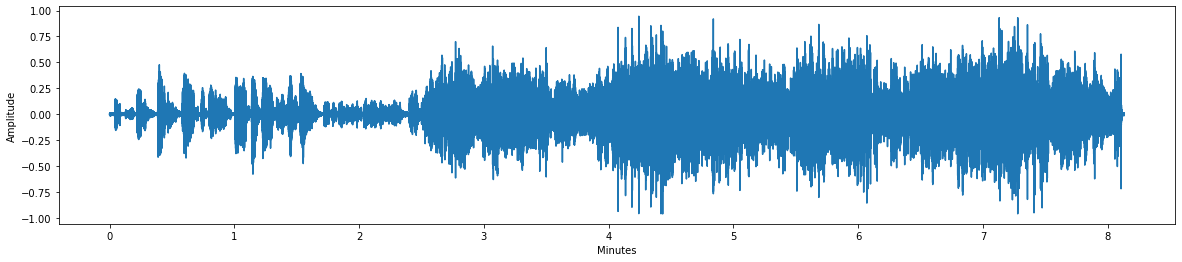

In [20]:
# play_audio(load_mixed_audio(song))
plot_waveform(load_mixed_audio(song))

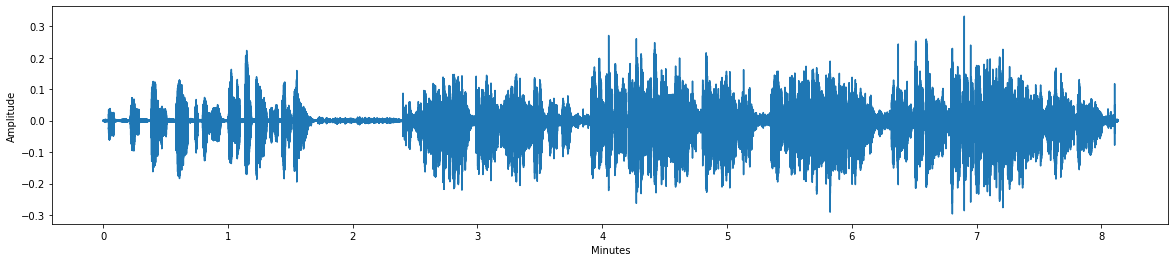

In [21]:
# play_audio(load_voice_audio(song))
plot_waveform(load_voice_audio(song))


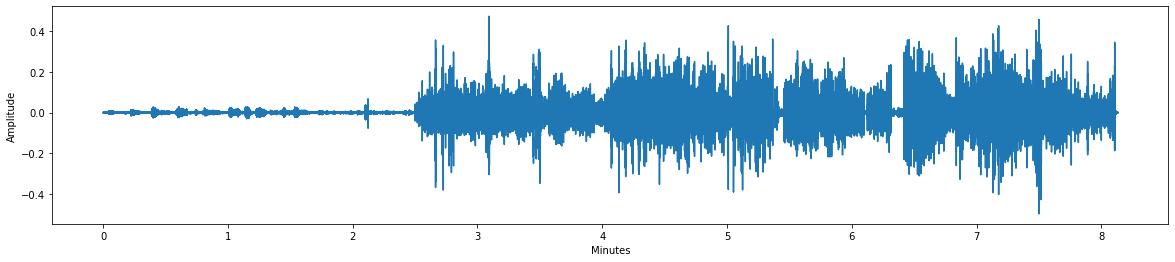

In [22]:
plot_waveform(load_mridangam_audio(song))

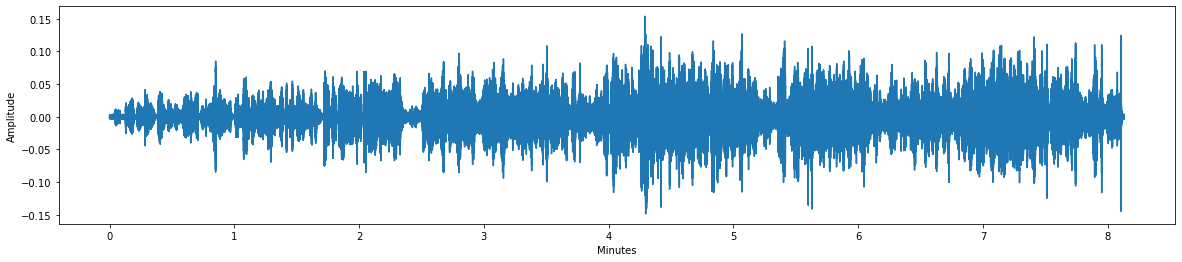

In [23]:
plot_waveform(load_violin_audio(song))

### Processing

Are the isolated vocal tracks sufficiently isolated? Libraries like [`spleeter`](https://github.com/deezer/spleeter) can help separate singing sources from background instruments. Does it help here?

In [24]:
from spleeter.separator import Separator

def separate_voice(audio_path, isolated_audio_output_path):
    """
    Apply spleeter source separation to input audio
    """
    separator = Separator('spleeter:2stems')
    separator.separate_to_file(audio_path,isolated_audio_output_path)

    

How does the quality compare? Does spleeter work effectively? Do we lose any important information?

In [25]:
separate_voice(saraga.track(song).audio_path, "spleeter_output.mp3")

INFO: Using config: {'_model_dir': 'pretrained_models\\2stems', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.7
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Use output_signature instead
Instructions for updating:
Use output_signature instead
INFO: Calling model_fn.
INFO: Apply unet for vocals_spect

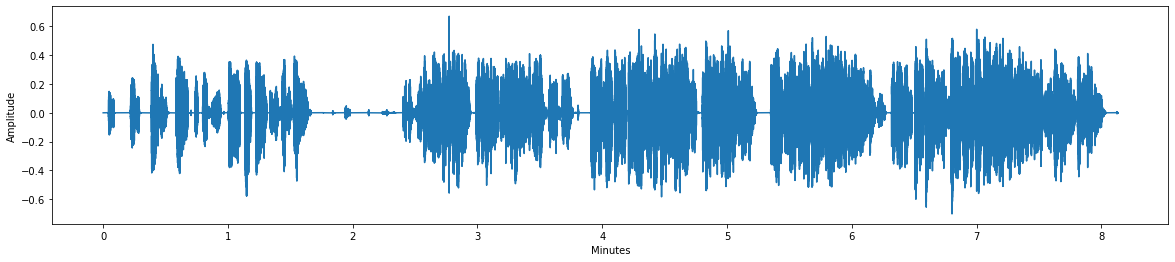

In [27]:
vocals_spleeter = librosa.load(r"C:\UPF\2023\3rd Term\Taller\Carnatic-Instrument-Classification\Dataset Creation\spleeter_output.mp3\Prathi Vaaram Vaaram.mp3\vocals.wav", sr=44100)[0]
plot_waveform(vocals_spleeter)

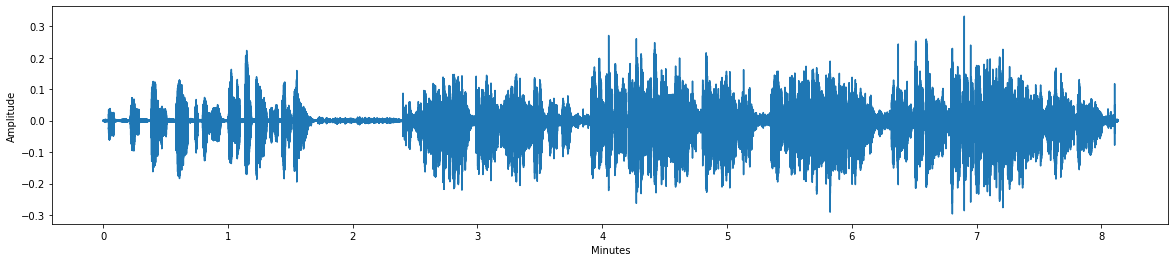

In [28]:
plot_waveform(load_voice_audio(song))

### Tagging Audio

We want to tag our audios with whether or not a particular instrument is sounding. We can do this by identifying non-silent regions in the isolated tracks and tagging the mixed tracks with the instrument. The `librosa` library contains functionality for identifying silent regions in audio (`librosa.effects.split`).

In [ ]:
# Load audios for each instrument track using previously defined functions

In [ ]:
# Plot samples of audios (remember the relationship between elements and sampling rate)

Define a function to identify silent regions in an audio array. Look at the documentation for `librosa.effects.split` ([here](https://librosa.org/doc/main/generated/librosa.effects.split.html)). 

**Hint** - The `top_db` parameter tunes the harshness of the cut (a higher value considers louder regions as "silent"). Experiment with this value and compare the results with the audio plots. Do they correspond to what you visualise/hear?

**Remember** - `librosa.effects.split` returns NON-silent intervals.

In [ ]:
def detect_silence(audio_array):
    """
    Return array of 0 and 1 (is silent/is not silent) for input <audio_array>. Returned array should
    be equal in length to input array
    """
    return is_silent

Do these regions correspond to what you hear when playing the audio with `play_audio` or what you see with `plot_waveform`?

In [ ]:
mridangam = [int(x or y) for x,y in zip(y_mridangam_left, y_mridangam_right)]

NameError: name 'y_mridangam_left' is not defined

### Extracting Samples

We should now have all the tools necessary to load and annotated audio. We now want to extract small snippets of audio  from the mixed tracks across the dataset and annotate each of these snippets as either containing voice, mridangam, violin or none of the above (a single audio should be able to have more than one tag). 

It is important that we have examples for all combinations of tags (violin, voice, mridangam, none). Each sample should be of the same length (what should that length be? think about the two extreme cases of very very short and very long, what problems would arise in each of these cases).

Each sample should have a unique identifier (index). The information relating to their tags should be stored in a metadata DataFrame where you can also find information about the performance.

These should all be saved in individual audio files.

Let us try with just on track to begin with...

1. For a certain track id, load all audio files (mix, violin, etc...)

In [ ]:
# mix_array =
# vocal_array =
# violin_array =
# vocal_array =
# mridangam_left_array =
# mridangam_right_array =

2. Create a silent/non-silent array using `detect_silence()` defined earlier. 

      **Remember**: The mridangam has two tracks corresponding to it, you must combine them to identify whether either is sounding

In [ ]:
# violin_silence = 
# vocal_silence = 
# mridangam_silnce = 

3. Split mixed audio into small chunks using [numpy array indexing](https://numpy.org/doc/stable/user/basics.indexing.html) (the size of these chunks should be informed by the literature)

4. Determine from your silent/non-silent arrays in Step 2 whether the chunk contains each instrument (voice, vocal, mridangam

In [ ]:
# Slice silence arrays identically to mix slice and determine yes/no does chunk contain instrument

5. Save each audio with a unique index.

    **Hint**: Audio arrays can be saved to file using the `soundfile` library:
    `sf.write('<filename>.wav', <audio_array>, <sampling rate>)`
    
    **Remember**: Each audio chunk  needs to be assigned a unique index so as to be managed correctly later on. Feel free to use numbers, hashes or uuids

In [ ]:
# store audio with soundfile

6. Add row to metadata table containing relevant track information, index, and instrument annotations.

    **Hint** - A `pandas` dataframe is a suitable place to store information relating to track and instrument annotations. You can create one using: 

    `import pandas as pd`

    `df = pd.DataFrame(columns=<list of columns names>])`
    
    Add new rows using append:
    
    `df.append({dict of {column_name:value>, ignore_index=True)`
    
    And save using:
    
    `df.to_csv('<path.csv>', index=False)`
    
    **Remember** - This table should include the metadata relating to the track, the unique chunk index and a column indicating whether or not it includes each instrument 
    

In [ ]:
# metadata dataframe

7. Repeat for many tracks and many chunks. Now you have written the individual code to do this for one track/chunk. Let's combine this and apply to a large number of tracks/chunks. Storing each with a unique index and a row in the metadata dataframe.

### Load Dataset

With our dataset created and saved in an intuitive and accessible format. Let's create some loaders to load the files and get metadata.

In [ ]:
def load_sample(index):
    """
    Load sample with index, <index>
    """
    return sample

def get_metadata(index):
    """
    Get metadata for sample with index, <index>
    """
    return sample

Typically, when datasets are presented, they are accompanied by some stats detailing their size and constiuent parts. What stats can you tell us about our dataset? Think about: number of seconds, performers, performances, instruments, ragas, filesizes etc.... 

In [ ]:
# stats

### Reproducible Code

Jupyter notebooks are great for experimenting, especially when visualisation or audio playback is required. However they are not great for reproducibility or source control. Can you abstract the code created here to .py file(s) so that the code can be ran in future without having to load the HTML notebook?